<H1>Marco Teórico: Preparación y Limpieza de Datos en Series Temporales </H1>

## 1. **Series Temporales**
Una serie temporal es una secuencia de observaciones registradas en intervalos de tiempo uniformes. Ejemplos incluyen precios de acciones, temperaturas y consumo de energía. La principal característica de las series temporales es que sus observaciones están ordenadas cronológicamente, lo que implica que el tiempo juega un papel crucial en su análisis.

## 2. **Manejo de Datos Faltantes**

Los datos faltantes son un problema común en el análisis de series temporales. Los días de feriado o fallos en la recolección de datos pueden ocasionar huecos en las observaciones. Existen varias técnicas para manejar estos valores:

## 2.1 **Llenado Adelante (Forward Fill)**
Este método reemplaza los valores faltantes con el último valor observado. Matemáticamente, se puede representar como:

$
x_t = x_{t-1} \quad \text{si} \, x_t \, \text{es un valor faltante}.
$

## 2.2 **Llenado Atrás (Backward Fill)**
El llenado hacia atrás usa el siguiente valor observado para reemplazar los valores faltantes:

$
x_t = x_{t+1} \quad \text{si} \, x_t \, \text{es un valor faltante}.
$

## 2.3 **Interpolación Lineal**
La interpolación lineal genera nuevos valores que caen en línea recta entre los puntos conocidos. Si tenemos dos puntos $x_{t-1}$ y $x_{t+1}$, el valor faltante $x_t$ se interpola linealmente:

$
x_t = x_{t-1} + \frac{x_{t+1} - x_{t-1}}{t+1 - (t-1)}.
$


## 3. **Resampleo y Agregación**

El **resampleo** es el proceso de modificar la frecuencia de las observaciones en una serie temporal, por ejemplo, convertir datos diarios en datos semanales o mensuales. La **agregación** implica calcular estadísticas como el promedio o la suma de las observaciones en cada nuevo intervalo.

### 3.1 **Resampleo a Frecuencias Más Bajas**
Si se tiene una serie temporal con frecuencia $f$, y se quiere reducir a una frecuencia $f'$ más baja, el proceso implica dividir el periodo total en bloques y calcular alguna estadística (como la media) sobre cada bloque. Para una serie $\{x_t\}$ con datos diarios resampleados a semanas, la media semanal sería:

$
x_{week} = \frac{1}{7} \sum_{i=1}^{7} x_{t+i}.
$

## 4. **Transformaciones de Datos**

Las transformaciones ayudan a estabilizar la varianza o convertir la serie temporal en estacionaria. A continuación, se describen dos transformaciones comunes.

### 4.1 **Diferencias Logarítmicas**

Las diferencias logarítmicas son útiles para eliminar tendencias no estacionarias en las series temporales y son muy comunes en el análisis de precios de acciones. Dada una serie de precios $x_t$, la diferencia logarítmica $y_t$ se define como:

$
y_t = \log(x_t) - \log(x_{t-1}) = \log\left(\frac{x_t}{x_{t-1}}\right).
$

Esta transformación captura el cambio porcentual relativo entre dos periodos consecutivos y ayuda a estabilizar la varianza.

### 4.2 **Suavizamiento Exponencial**
El suavizamiento exponencial reduce el ruido en las series temporales, dándole mayor peso a las observaciones recientes. La media móvil exponencial (EMA) se define recursivamente como:

$
EMA_t = \alpha x_t + (1 - \alpha) EMA_{t-1},
$

donde $\alpha$ es el parámetro de suavizamiento $ 0 < \alpha \leq 1 $, y $x_t$ es la observación en el tiempo $t$ .

Si $\alpha$ es cercano a 1, las observaciones recientes tienen más peso, mientras que un valor más bajo de $\alpha$ otorga mayor importancia a observaciones más antiguas. Este método suaviza las fluctuaciones de corto plazo sin perder la tendencia general de la serie.


### 5. **Visualización de Datos**

La visualización es una herramienta fundamental para el análisis de series temporales, ya que facilita la interpretación de patrones, tendencias y ciclos. Los gráficos de líneas son comúnmente utilizados para representar series temporales y permiten comparar datos originales con series suavizadas o transformadas.

### **Ejemplo Gráfico**:
- El gráfico de la serie original muestra las fluctuaciones a lo largo del tiempo.
- Superponiendo la serie suavizada, podemos observar cómo el ruido se reduce y la tendencia principal es más clara.
  

<H1>Módulo 2: Preparación y Limpieza de Datos de Series Temporales</H1> 

**Paso 1: Importación de Librerías y Descarga de Datos**

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar una serie temporal (precios de acciones, por ejemplo AAPL - Apple Inc.)
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Mostramos las primeras filas del DataFrame
print(data.head())

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.273605   
2022-01-04  182.630005  182.940002  179.119995  179.699997  176.998367   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.290161   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.414124   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.581573   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.273605,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,176.998367,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.290161,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.414124,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.581573,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.631348,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.818420,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.865585,85438400


**Paso 2: Manejo de Datos Faltantes**

Las series temporales a menudo tienen datos faltantes, lo que es común en los precios de cierre de acciones debido a feriados o días sin operaciones. Aplicaremos métodos de interpolación y llenado de datos faltantes.

In [3]:
# Revisamos si hay valores faltantes en la serie temporal
print(data.isnull().sum())

# Método de llenado hacia adelante (Forward Fill)
data_ffill = data.ffill()

# Método de llenado hacia atrás (Backward Fill)
data_bfill = data.bfill()

# Interpolación lineal
data_interpolated = data.interpolate(method='linear')

# Mostramos los primeros valores después de manejar los datos faltantes
print(data_interpolated.head())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.273605   
2022-01-04  182.630005  182.940002  179.119995  179.699997  176.998367   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.290161   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.414124   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.581573   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


**Paso 3: Resampleo y Agregación de Series Temporales**

El resampleo es útil para cambiar la frecuencia de las series temporales, como agrupar los datos diarios en datos semanales o mensuales.

In [5]:
# Resampleo de datos diarios a datos semanales (usando el precio de cierre)
weekly_data = data_interpolated['Close'].resample('W').mean()

# Resampleo de datos diarios a datos mensuales (usando el precio de cierre)
monthly_data = data_interpolated['Close'].resample('M').mean()

In [6]:
# Mostramos los datos semanales y mensuales
print(weekly_data.head())
print(monthly_data.head())

Date
2022-01-09    176.159998
2022-01-16    173.612003
2022-01-23    165.737499
2022-01-30    162.128000
2022-02-06    174.103998
Freq: W-SUN, Name: Close, dtype: float64
Date
2022-01-31    169.861500
2022-02-28    169.830001
2022-03-31    165.310435
2022-04-30    166.820999
2022-05-31    148.430477
Freq: M, Name: Close, dtype: float64


**Paso 4: Transformaciones de Datos**

En análisis de series temporales, a menudo se aplican transformaciones como diferencias logarítmicas o suavizamiento para hacer que los datos sean más estacionarios y fáciles de modelar.

**4.1: Diferencias Logarítmicas**. Esta técnica nos ayuda a eliminar tendencias no estacionarias.

In [9]:
# Aplicamos la transformación de diferencia logarítmica en los datos de cierre
log_diff = np.log(data_interpolated['Close']).diff()

# Mostramos las primeras diferencias logarítmicas
print(log_diff.head())

# Eliminamos los valores NaN resultantes de la primera diferencia
log_diff = log_diff.dropna()


Date
2022-01-03         NaN
2022-01-04   -0.012773
2022-01-05   -0.026960
2022-01-06   -0.016834
2022-01-07    0.000988
Name: Close, dtype: float64


In [13]:
log_diff

Date
2022-01-04   -0.012773
2022-01-05   -0.026960
2022-01-06   -0.016834
2022-01-07    0.000988
2022-01-10    0.000116
                ...   
2022-12-23   -0.002802
2022-12-27   -0.013976
2022-12-28   -0.031166
2022-12-29    0.027931
2022-12-30    0.002466
Name: Close, Length: 250, dtype: float64

**4.2: Suavizamiento Exponencial.** El suavizamiento exponencial es útil para reducir el ruido en los datos de series temporales.

In [11]:
# Aplicamos un suavizamiento exponencial (media móvil exponencial)
smoothed_data = data_interpolated['Close'].ewm(span=10, adjust=False).mean()

# Mostramos las primeras filas después del suavizamiento
print(smoothed_data.head())

Date
2022-01-03    182.009995
2022-01-04    181.589995
2022-01-05    180.377268
2022-01-06    178.854129
2022-01-07    177.638832
Name: Close, dtype: float64


**Paso 5: Visualización de Datos**

Finalmente, visualizamos los resultados antes y después del manejo de datos faltantes, la transformación logarítmica y el suavizamiento.

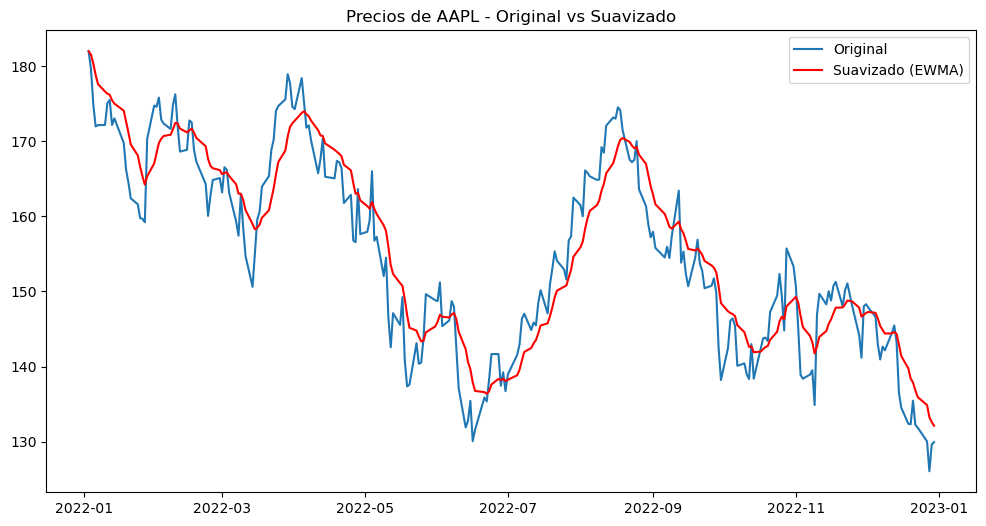

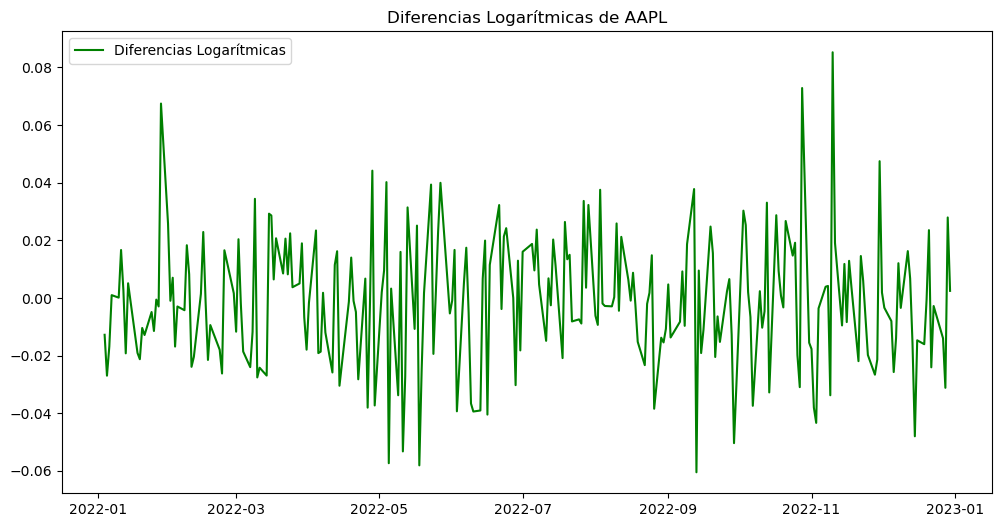

In [12]:
# Gráfica de la serie temporal original y la suavizada
plt.figure(figsize=(12, 6))
plt.plot(data_interpolated['Close'], label='Original')
plt.plot(smoothed_data, label='Suavizado (EWMA)', color='red')
plt.title(f'Precios de {symbol} - Original vs Suavizado')
plt.legend()
plt.show()

# Gráfica de diferencias logarítmicas
plt.figure(figsize=(12, 6))
plt.plot(log_diff, label='Diferencias Logarítmicas', color='green')
plt.title(f'Diferencias Logarítmicas de {symbol}')
plt.legend()
plt.show()